# Loading Data

In [2]:
import pandas as pd
from prophet import Prophet
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
average_change_sea_levels_df = pd.read_csv('Resources/25_Change_in_Mean_Sea_Levels.csv')



In [4]:
average_change_sea_levels_df

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
0,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Sea Okhotsk,D12/16/1992,10.11
1,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Adriatic Sea,D12/17/1992,32.73
2,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Andaman Sea,D12/17/1992,-14.88
3,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Arabian Sea,D12/17/1992,-9.76
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66
...,...,...,...,...,...,...,...,...,...,...,...,...
39612,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",South China,D04/14/2024,4.02
39613,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Southern Ocean,D04/14/2024,3.11
39614,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Tropics,D04/14/2024,3.20
39615,World,NaN,WLD,Change in mean sea level: Sea level: Trend,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D04/14/2024,3.14


In [5]:
bodies_of_water = average_change_sea_levels_df['Measure'].unique().tolist()
bodies_of_water

['Sea Okhotsk',
 'Adriatic Sea',
 'Andaman Sea',
 'Arabian Sea',
 'Atlantic Ocean',
 'Baltic Sea',
 'Bay Bengal',
 'Bering Sea',
 'Caribbean Sea',
 'Gulf Mexico',
 'Indian Ocean',
 'Indonesian',
 'Mediterranean',
 'Nino',
 'North Pacific',
 'North Sea',
 'Pacific Ocean',
 'Sea Japan',
 'South China',
 'Southern Ocean',
 'Tropics',
 'World',
 'Yellow Sea',
 'North Atlantic',
 'Persian Gulf']

#### Checking each type of body of water used in this data set and checking to make sure they all have near the same amount of entries

In [7]:
average_change_sea_levels_df['Measure'].value_counts()

Measure
World             1600
Indian Ocean      1587
Southern Ocean    1587
Atlantic Ocean    1587
Nino              1587
Tropics           1587
Pacific Ocean     1586
North Pacific     1586
Bering Sea        1586
Indonesian        1585
Caribbean Sea     1585
South China       1585
Arabian Sea       1585
North Atlantic    1585
Gulf Mexico       1584
Baltic Sea        1584
Mediterranean     1584
Sea Okhotsk       1583
Sea Japan         1583
North Sea         1583
Bay Bengal        1583
Yellow Sea        1582
Andaman Sea       1580
Adriatic Sea      1578
Persian Gulf      1575
Name: count, dtype: int64

#### Trying to find the total sea level change from 1992 to 2024 for each body of water

In [9]:
grouped_df = average_change_sea_levels_df.groupby(by=['Measure']).sum()
total_sea_change = grouped_df[['Value']]
total_sea_change

,Value
Measure,
Adriatic Sea,37897.84
Andaman Sea,61579.17
Arabian Sea,56200.74
Atlantic Ocean,48196.39
Baltic Sea,67680.54
Bay Bengal,60020.19
Bering Sea,30903.69
Caribbean Sea,52883.62
Gulf Mexico,71461.79


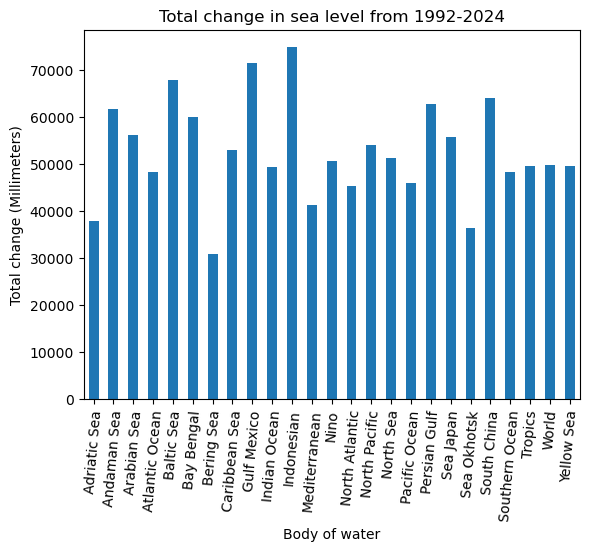

In [10]:
grouped_df.plot(kind='bar', y='Value', legend=False)
plt.ylabel('Total change (Millimeters)')
plt.xlabel('Body of water')
plt.title('Total change in sea level from 1992-2024')
plt.xticks(rotation=85)
plt.show()

**Potential questions to ask:**

    - Are water levels rising or decreasing?
    - How have sea level changes differed between regions?
    - How has the change in sea level differed over time?
    - What will the sea level changes look like in the near future?

# Are water levels increasing or decreasing and why?

In [13]:
world_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'World']

#### I am making a new column to display the cumulative change for each day in order to have a graph that makes the most sense to compare.

In [15]:
initial_sea_level = 0
world_df['Total Change'] = initial_sea_level + world_df['Value'].cumsum()
world_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\783912562.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  world_df['Total Change'] = initial_sea_level + world_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value,Total Change
21,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D12/17/1992,-14.72,-14.72
47,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D12/27/1992,-19.32,-34.04
71,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/05/1993,-22.12,-56.16
92,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/15/1993,-23.42,-79.58
123,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",World,D01/24/1993,-24.72,-104.30


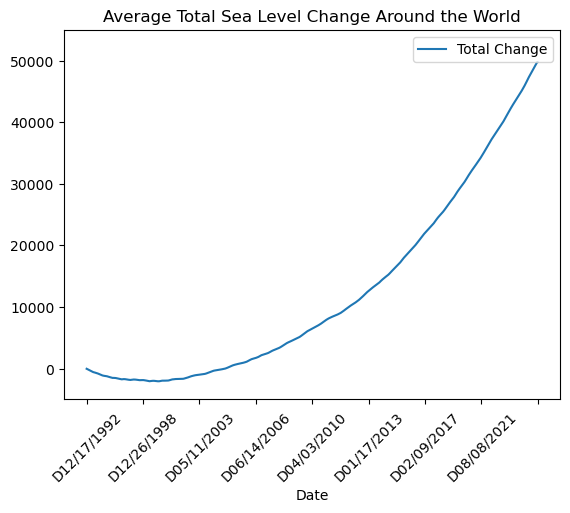

In [16]:
world_df.plot(kind='line', x='Date', y='Total Change', rot=45)
plt.title('Average Total Sea Level Change Around the World')
plt.ylim(-5000, 55000)
plt.show()

## How has the change in sea level differed between regions?

In [18]:
pacific_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Pacific Ocean']
atlantic_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Atlantic Ocean']
indian_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Indian Ocean']

#### I am seperating the three major oceans in this data in order to try and compare them as their own regions.

In [20]:
pacific_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
16,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D12/17/1992,-14.7
44,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D12/27/1992,-29.7
66,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/05/1993,-32.0
87,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/15/1993,-35.3
117,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,D01/24/1993,-31.9


In [21]:
atlantic_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
4,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/17/1992,-13.66
35,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D12/27/1992,-10.96
53,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/05/1993,-18.06
96,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/16/1993,-15.16
106,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,D01/24/1993,-20.96


In [22]:
indian_df.head()

,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Date,Value
10,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D12/17/1992,-26.92
38,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D12/27/1992,-11.72
59,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/05/1993,-5.12
81,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/15/1993,-3.12
110,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,D01/24/1993,-10.22


#### Adding the Total Change column for each region

In [24]:
initial_sea_level = 0
pacific_df['Total Change'] = initial_sea_level + pacific_df['Value'].cumsum()
pacific_df = pacific_df.set_index('Date')
pacific_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\3727811476.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pacific_df['Total Change'] = initial_sea_level + pacific_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-14.7,-14.7
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-29.7,-44.4
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-32.0,-76.4
D01/15/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-35.3,-111.7
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Pacific Ocean,-31.9,-143.6


In [25]:
initial_sea_level = 0
atlantic_df['Total Change'] = initial_sea_level + atlantic_df['Value'].cumsum()
atlantic_df = atlantic_df.set_index('Date')
atlantic_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\800401511.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  atlantic_df['Total Change'] = initial_sea_level + atlantic_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-13.66,-13.66
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-10.96,-24.62
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-18.06,-42.68
D01/16/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-15.16,-57.84
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Atlantic Ocean,-20.96,-78.80


In [26]:
initial_sea_level = 0
indian_df['Total Change'] = initial_sea_level + indian_df['Value'].cumsum()
indian_df = indian_df.set_index('Date')
indian_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\743650038.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  indian_df['Total Change'] = initial_sea_level + indian_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-26.92,-26.92
D12/27/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-11.72,-38.64
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-5.12,-43.76
D01/15/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-3.12,-46.88
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Indian Ocean,-10.22,-57.10


#### Comparing all 3 large bodies of water and the world average on a plot

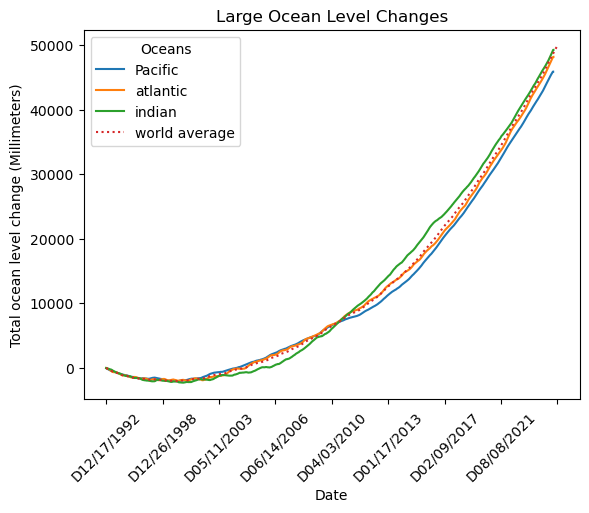

In [28]:
fig, ax = plt.subplots()

pacific_df['Total Change'].plot(ax=ax, kind='line', label='Pacific')
atlantic_df['Total Change'].plot(ax=ax, kind='line', label='atlantic')
indian_df['Total Change'].plot(ax=ax, kind='line', label='indian')
world_df.plot(ax=ax, kind='line', x='Date', y='Total Change', label='world average', linestyle = ':')

ax.set_ylabel('Total ocean level change (Millimeters)')
ax.set_xlabel('Date')
plt.title('Large Ocean Level Changes')
plt.legend(title='Oceans')
plt.xticks(rotation=45)
plt.show()

### How do sea level changes in enclosed seas like the Mediterranean compare to open areas such as the atlantic or pacific?

In [30]:
mediterranean_df = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Mediterranean']

In [31]:
initial_sea_level = 0
mediterranean_df['Total Change'] = initial_sea_level + mediterranean_df['Value'].cumsum()
mediterranean_df = mediterranean_df.set_index('Date')
mediterranean_df.head()

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\1516075878.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mediterranean_df['Total Change'] = initial_sea_level + mediterranean_df['Value'].cumsum()


,Country,ISO2,ISO3,Indicator,Unit,Source,CTS Code,CTS Name,CTS Full Descriptor,Measure,Value,Total Change
Date,,,,,,,,,,,,
D12/17/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,48.86,48.86
D12/26/1992,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,-19.24,29.62
D01/05/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,-91.14,-61.52
D01/15/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,-58.14,-119.66
D01/24/1993,World,NaN,WLD,Change in mean sea level: Sea level: TOPEX.Pos...,Millimeters,National Oceanic and Atmospheric Administratio...,ECCL,Change in Mean Sea Level,"Environment, Climate Change, Climate and Weath...",Mediterranean,-101.84,-221.50


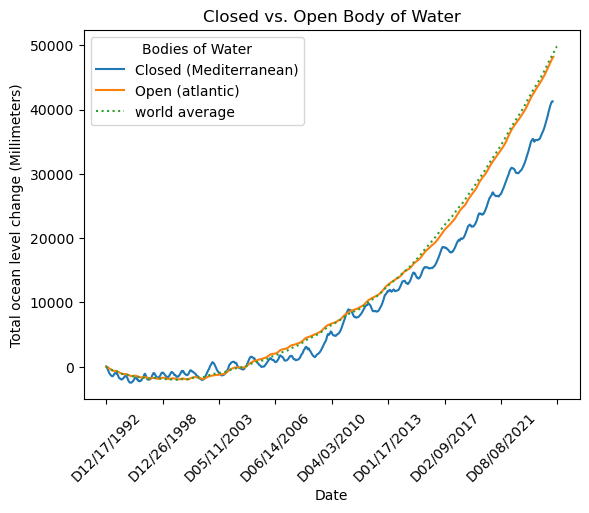

In [32]:
fig, ax2 = plt.subplots()

mediterranean_df['Total Change'].plot(ax=ax2, kind='line', label='Closed (Mediterranean)')
atlantic_df['Total Change'].plot(ax=ax2, kind='line', label='Open (atlantic)')
world_df.plot(ax=ax2, kind='line', x='Date', y='Total Change', label='world average', linestyle = ':')

plt.title('Closed vs. Open Body of Water')
ax2.set_ylabel('Total ocean level change (Millimeters)')
ax2.set_xlabel('Date')
plt.legend(title='Bodies of Water')
plt.xticks(rotation=45)
plt.show()

### What do the sea level changes look like for the smaller bodies of water within each large body of water

#### Pacific Ocean

In [35]:
bering_sea = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Bering Sea']
sea_of_japan = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Sea Japan']
yellow_sea = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Yellow Sea']
south_china = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'South China']

##### Getting the total change in sea level for each body of water

In [37]:
bering_sea['Total Change'] = initial_sea_level + bering_sea['Value'].cumsum()
bering_sea = bering_sea.set_index('Date')

sea_of_japan['Total Change'] = initial_sea_level + sea_of_japan['Value'].cumsum()
sea_of_japan = sea_of_japan.set_index('Date')

yellow_sea['Total Change'] = initial_sea_level + yellow_sea['Value'].cumsum()
yellow_sea = yellow_sea.set_index('Date')

south_china['Total Change'] = initial_sea_level + south_china['Value'].cumsum()
south_china = south_china.set_index('Date')

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2601269229.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bering_sea['Total Change'] = initial_sea_level + bering_sea['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2601269229.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_of_japan['Total Change'] = initial_sea_level + sea_of_japan['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2601269229.py:7: SettingWithCopyWarning: 
A value is trying to be set on a c

##### Plotting the total change over time for each body of water within the Pacific Ocean

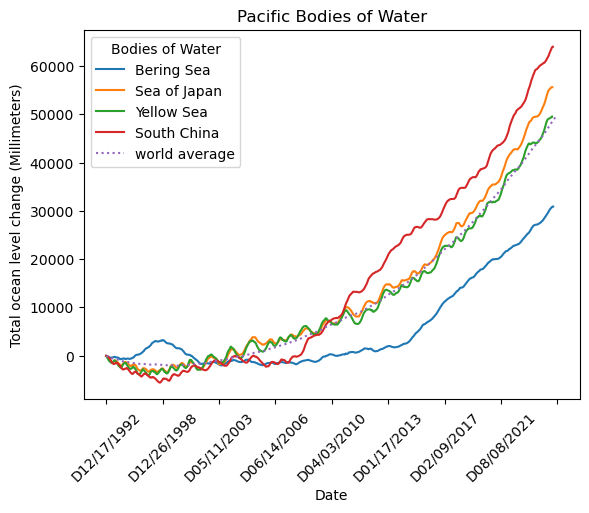

In [103]:
fig, ax3 = plt.subplots()

bering_sea['Total Change'].plot(ax=ax3, kind='line', label='Bering Sea')
sea_of_japan['Total Change'].plot(ax=ax3, kind='line', label='Sea of Japan')
yellow_sea['Total Change'].plot(ax=ax3, kind='line', label='Yellow Sea')
south_china['Total Change'].plot(ax=ax3, kind='line', label='South China')
world_df.plot(ax=ax3, kind='line', x='Date', y='Total Change', label='world average', linestyle = ':')

plt.title('Pacific Bodies of Water')
ax3.set_ylabel('Total ocean level change (Millimeters)')
ax3.set_xlabel('Date')
plt.legend(title='Bodies of Water')
plt.xticks(rotation=45)
plt.show()

#### Atlantic

In [41]:
caribbean = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Caribbean Sea']
gulf_of_mexico = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Gulf Mexico']
adratic = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Adratic Sea']
north_sea = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'North Sea']
baltic = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Baltic Sea']
bay_of_bengal = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Bay Bengal']

In [42]:
caribbean['Total Change'] = initial_sea_level + caribbean['Value'].cumsum()
caribbean = caribbean.set_index('Date')

gulf_of_mexico['Total Change'] = initial_sea_level + gulf_of_mexico['Value'].cumsum()
gulf_of_mexico = gulf_of_mexico.set_index('Date')

adratic['Total Change'] = initial_sea_level + adratic['Value'].cumsum()
adratic = adratic.set_index('Date')

north_sea['Total Change'] = initial_sea_level + north_sea['Value'].cumsum()
north_sea = north_sea.set_index('Date')

baltic['Total Change'] = initial_sea_level + baltic['Value'].cumsum()
baltic = baltic.set_index('Date')

bay_of_bengal['Total Change'] = initial_sea_level + bay_of_bengal['Value'].cumsum()
bay_of_bengal = bay_of_bengal.set_index('Date')

C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\3418830019.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  caribbean['Total Change'] = initial_sea_level + caribbean['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\3418830019.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gulf_of_mexico['Total Change'] = initial_sea_level + gulf_of_mexico['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\3418830019.py:10: SettingWithCopyWarning: 
A value is trying to be set on 

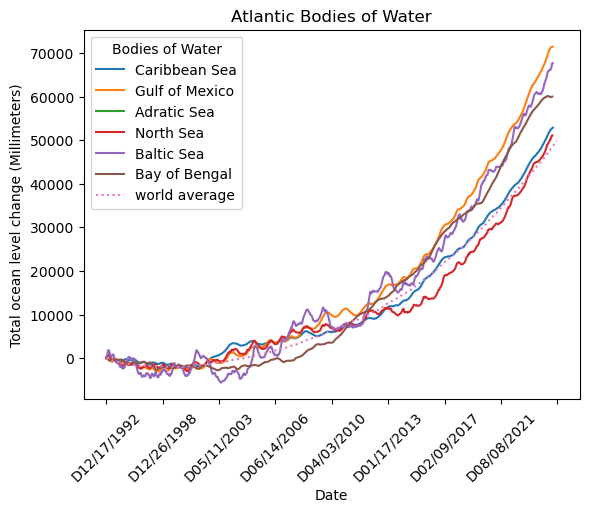

In [105]:
fig, ax4 = plt.subplots()

caribbean['Total Change'].plot(ax=ax4, kind='line', label='Caribbean Sea')
gulf_of_mexico['Total Change'].plot(ax=ax4, kind='line', label='Gulf of Mexico')
adratic['Total Change'].plot(ax=ax4, kind='line', label='Adratic Sea')
north_sea['Total Change'].plot(ax=ax4, kind='line', label='North Sea')
baltic['Total Change'].plot(ax=ax4, kind='line', label='Baltic Sea')
bay_of_bengal['Total Change'].plot(ax=ax4, kind='line', label='Bay of Bengal')
world_df.plot(ax=ax4, kind='line', x='Date', y='Total Change', label='world average', linestyle = ':')

plt.title('Atlantic Bodies of Water')
ax4.set_ylabel('Total ocean level change (Millimeters)')
ax4.set_xlabel('Date')
plt.legend(title='Bodies of Water')
plt.xticks(rotation=45)
plt.show()

# How will the world's sea levels change in the near future?

#### Setting up the data for Prophet using the worlds average sea level

In [46]:
world_prophet_df = world_df[['Date', 'Value']]
world_prophet_df = world_prophet_df.reset_index(drop=True)
world_prophet_df.columns = ['ds','y']
world_prophet_df.dropna()
world_prophet_df

,ds,y
0,D12/17/1992,-14.72
1,D12/27/1992,-19.32
2,D01/05/1993,-22.12
3,D01/15/1993,-23.42
4,D01/24/1993,-24.72
...,...,...
1595,D04/05/2024,73.35
1596,D04/07/2024,75.23
1597,D04/13/2024,73.15
1598,D04/14/2024,78.43


In [47]:
def real_date(x):
    return x[1:]
world_prophet_df['ds'] = world_prophet_df['ds'].apply(real_date)
world_prophet_df

,ds,y
0,12/17/1992,-14.72
1,12/27/1992,-19.32
2,01/05/1993,-22.12
3,01/15/1993,-23.42
4,01/24/1993,-24.72
...,...,...
1595,04/05/2024,73.35
1596,04/07/2024,75.23
1597,04/13/2024,73.15
1598,04/14/2024,78.43


In [48]:
model = Prophet()

In [49]:
model.fit(world_prophet_df)

19:32:20 - cmdstanpy - INFO - Chain [1] start processing
19:32:20 - cmdstanpy - INFO - Chain [1] done processing


#### Making a new data set that has the original values, plus more 18250 days (50 years) to be predicted.

In [51]:
future_sea_level_df = model.make_future_dataframe(periods=18250, freq = 'D')
future_sea_level_df.tail()

,ds
19635,2074-03-29
19636,2074-03-30
19637,2074-03-31
19638,2074-04-01
19639,2074-04-02


In [52]:
forecast = model.predict(future_sea_level_df)
forecast.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
19635,2074-03-29,272.953324,154.895907,388.675101,157.765713,395.400129,-4.532494,-4.532494,-4.532494,0.008782,0.008782,0.008782,-4.541276,-4.541276,-4.541276,0.0,0.0,0.0,268.420830
19636,2074-03-30,272.963809,154.426748,391.315492,157.762303,395.415352,-4.777931,-4.777931,-4.777931,-0.143111,-0.143111,-0.143111,-4.634819,-4.634819,-4.634819,0.0,0.0,0.0,268.185879
19637,2074-03-31,272.974295,152.801748,390.153934,157.758893,395.430576,-4.547910,-4.547910,-4.547910,0.183326,0.183326,0.183326,-4.731237,-4.731237,-4.731237,0.0,0.0,0.0,268.426385
19638,2074-04-01,272.984781,155.066009,390.087151,157.755484,395.445799,-5.078313,-5.078313,-5.078313,-0.248379,-0.248379,-0.248379,-4.829934,-4.829934,-4.829934,0.0,0.0,0.0,267.906468
19639,2074-04-02,272.995267,152.932629,389.859936,157.752074,395.461022,-5.146519,-5.146519,-5.146519,-0.216272,-0.216272,-0.216272,-4.930248,-4.930248,-4.930248,0.0,0.0,0.0,267.848747


#### Plot of the world's average sea level change from 1992 - 2074

C:\Users\ahsha\anaconda3\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ahsha\anaconda3\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


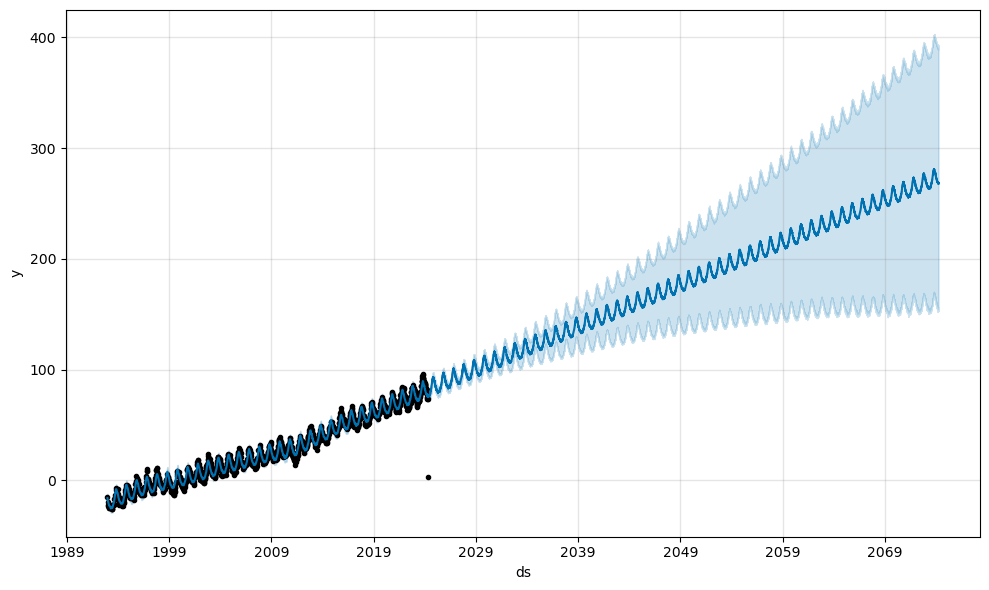

In [54]:
model.plot(forecast);

<Axes: >

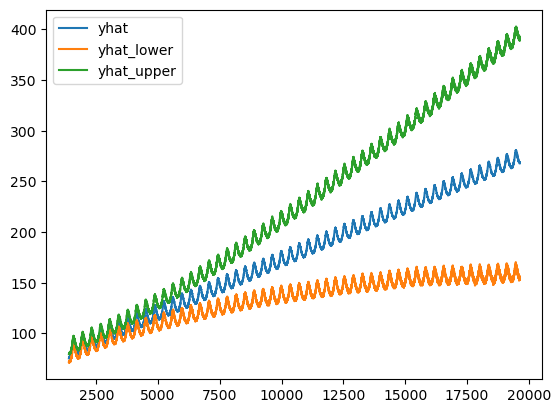

In [55]:
forecast[["yhat", "yhat_lower", "yhat_upper"]].iloc[-18250:, :].plot()

In [56]:
forecast.reset_index()

,index,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,0,1992-12-17,-20.815891,-20.062166,-12.157692,-20.815891,-20.815891,4.712650,4.712650,4.712650,0.008782,0.008782,0.008782,4.703868,4.703868,4.703868,0.0,0.0,0.0,-16.103241
1,1,1992-12-27,-20.702419,-22.092647,-14.037973,-20.702419,-20.702419,2.753418,2.753418,2.753418,-0.248379,-0.248379,-0.248379,3.001798,3.001798,3.001798,0.0,0.0,0.0,-17.949000
2,2,1993-01-05,-20.600293,-23.043658,-14.776519,-20.600293,-20.600293,1.790095,1.790095,1.790095,0.212205,0.212205,0.212205,1.577890,1.577890,1.577890,0.0,0.0,0.0,-18.810199
3,3,1993-01-15,-20.486821,-24.272888,-15.995511,-20.486821,-20.486821,0.490846,0.490846,0.490846,-0.143111,-0.143111,-0.143111,0.633958,0.633958,0.633958,0.0,0.0,0.0,-19.995975
4,4,1993-01-24,-20.384696,-24.750392,-16.500431,-20.384696,-20.384696,-0.307889,-0.307889,-0.307889,-0.248379,-0.248379,-0.248379,-0.059510,-0.059510,-0.059510,0.0,0.0,0.0,-20.692585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19635,19635,2074-03-29,272.953324,154.895907,388.675101,157.765713,395.400129,-4.532494,-4.532494,-4.532494,0.008782,0.008782,0.008782,-4.541276,-4.541276,-4.541276,0.0,0.0,0.0,268.420830
19636,19636,2074-03-30,272.963809,154.426748,391.315492,157.762303,395.415352,-4.777931,-4.777931,-4.777931,-0.143111,-0.143111,-0.143111,-4.634819,-4.634819,-4.634819,0.0,0.0,0.0,268.185879
19637,19637,2074-03-31,272.974295,152.801748,390.153934,157.758893,395.430576,-4.547910,-4.547910,-4.547910,0.183326,0.183326,0.183326,-4.731237,-4.731237,-4.731237,0.0,0.0,0.0,268.426385
19638,19638,2074-04-01,272.984781,155.066009,390.087151,157.755484,395.445799,-5.078313,-5.078313,-5.078313,-0.248379,-0.248379,-0.248379,-4.829934,-4.829934,-4.829934,0.0,0.0,0.0,267.906468


C:\Users\ahsha\anaconda3\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
C:\Users\ahsha\anaconda3\Lib\site-packages\prophet\plot.py:351: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  df_y['ds'].dt.to_pydatetime(), seas[name], ls='-', c='#0072B2')
C:\Users\ahsha\anaconda3\Lib\site-packages\prophet\plot.py:354: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np

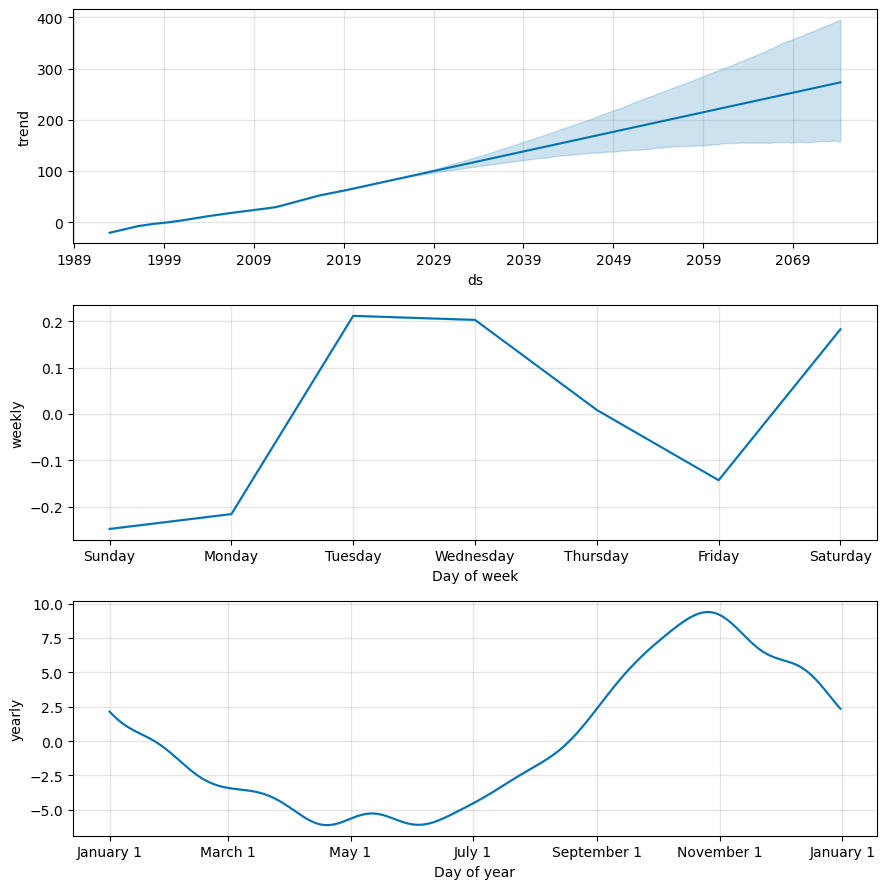

In [57]:
model.plot_components(forecast);

### Indian Ocean

In [59]:
andaman = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Andaman Sea']
arabian = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Arabian Sea']
persian = average_change_sea_levels_df.loc[average_change_sea_levels_df['Measure'] == 'Persian Gulf']

In [60]:
andaman['Total Change'] = initial_sea_level + andaman['Value'].cumsum()
andaman = andaman.set_index('Date')

arabian['Total Change'] = initial_sea_level + arabian['Value'].cumsum()
arabian = arabian.set_index('Date')

persian['Total Change'] = initial_sea_level + persian['Value'].cumsum()
persian = persian.set_index('Date')


C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2033486840.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andaman['Total Change'] = initial_sea_level + andaman['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2033486840.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  arabian['Total Change'] = initial_sea_level + arabian['Value'].cumsum()
C:\Users\ahsha\AppData\Local\Temp\ipykernel_40524\2033486840.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

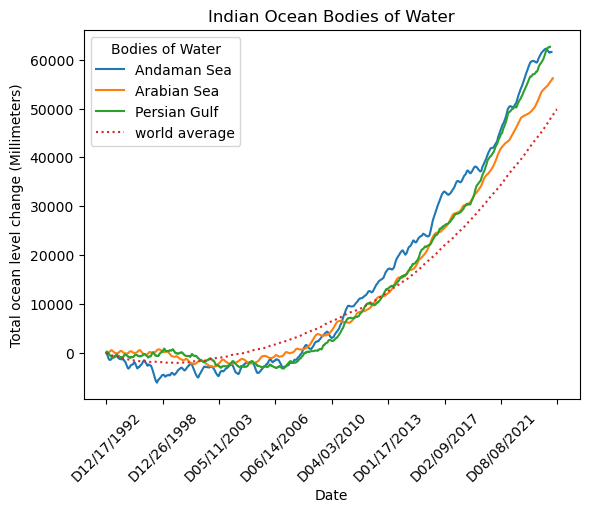

In [107]:
fig, ax5 = plt.subplots()

andaman['Total Change'].plot(ax=ax5, kind='line', label='Andaman Sea')
arabian['Total Change'].plot(ax=ax5, kind='line', label='Arabian Sea')
persian['Total Change'].plot(ax=ax5, kind='line', label='Persian Gulf')
world_df.plot(ax=ax5, kind='line', x='Date', y='Total Change', label='world average', linestyle = ':')

plt.title('Indian Ocean Bodies of Water')
ax5.set_ylabel('Total ocean level change (Millimeters)')
ax5.set_xlabel('Date')
plt.legend(title='Bodies of Water')
plt.xticks(rotation=45)
plt.show()